<img src="https://2.bp.blogspot.com/-066qpJs0Ttc/WiYPXGNYEYI/AAAAAAAAFu8/XbOaf7DqfDMM9truu3DkrkIGfRgP4zBzgCLcBGAs/s1600/udinus.jpg"  width="200">

# Ujian Tengah Semester


Nim: **`A12.2020.06443`**

Nama: **`ISRO' RIZKY WIBOWO`**

Kelompok: **`A12.6503`**

soal 1: perbaikan kata - stop word

soal 2: perbaikan kata - tidak pakai stop word

soal 3: tidak menggunakan perbaikan kata - stop word

soal 4: tidak menggunakan perbaikan kata - tidak pakai stop word

## load library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/File AMS2023')

Mounted at /content/drive


## instalasi

In [ ]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 


## load eksprasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


## load library

In [ ]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


## load dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/File AMS2023/Dataset_Sentimen_Emosi.csv')

In [ ]:
df.head()

,Tweet,Sentimen,Emosi
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-1.0,-2
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,1
2,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,-1
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,1
4,Covid belum nyampe prigen mbak hmm hoax,0.0,-2


# Pengerjaan soal

In [ ]:
df = df.drop(['Sentimen'], axis=1)

## Preprocessing

#### Setting Function Sesuai Kebutuhan

In [ ]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space(text):
    return " ".join(text.split())

def remove_emoji(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

#### Running Preprocessing

In [ ]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = non_ascii(proc)
    proc = remove_emoji(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

Setelah dilakukan tahap preprocessing, kita load datanya ke kolom baru yang akan kita buat

In [ ]:
df["step01"] = final_string

In [ ]:
df.head()

,Tweet,Emosi,step01
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2,emang lemes bgt ya mulut lu gue yg mau beli be...
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid number mari kita dirum...
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid number me...
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
4,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax


Cek kolom data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   905 non-null    object
 1   Emosi   905 non-null    int64 
 2   step01  905 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.3+ KB


#### Drop null values

In [ ]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [ ]:
df_new = df[~df.isin(df_hapus)].dropna()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   904 non-null    object 
 1   Emosi   904 non-null    float64
 2   step01  904 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


## Perbaikan Kata

In [ ]:
# Token

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [ ]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [ ]:
df_new.head(10)

,Tweet,Emosi,step01,tokens
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"[emang, lemes, bgt, ya, mulut, lu, gue, yg, ma..."
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit..."
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu..."
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
4,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
5,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k..."
6,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas covid,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l..."
7,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jum at jum at keempat di kal...,"[selamat, pagi, hari, jum, at, jum, at, keempa..."
8,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid number smg para ...,"[hikmah, di, balik, musibah, covid, number, sm..."
9,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid number beserta jajaran polsek kura...,"[cegah, covid, number, beserta, jajaran, polse..."


### Proses Perbaikan Kata

In [ ]:
normalized_word = pd.read_excel("/content/drive/My Drive/File AMS2023/kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

In [ ]:
df_new.head()

,Tweet,Emosi,step01,tokens,tokens_perbaikan
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"[emang, lemes, bgt, ya, mulut, lu, gue, yg, ma...","[memang, lemes, banget, iya, mulut, kamu, saya..."
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit..."
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu..."
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga..."
4,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh..."


### Tampilan Sebelum dan Sesudah Perbaikan Kata

In [ ]:
# Sebelum
df_new.iloc[0].tokens

['emang',
 'lemes',
 'bgt',
 'ya',
 'mulut',
 'lu',
 'gue',
 'yg',
 'mau',
 'beli',
 'beli',
 'obat',
 'aja',
 'mikirr',
 'drmn',
 'bisa',
 'beli',
 'obat',
 'kalo',
 'ga',
 'kerja',
 'devil']

In [ ]:
# Sesudah
df_new.iloc[0].tokens_perbaikan

['memang',
 'lemes',
 'banget',
 'iya',
 'mulut',
 'kamu',
 'saya',
 'yang',
 'mau',
 'beli',
 'beli',
 'obat',
 'saja',
 'mikirr',
 'drmn',
 'bisa',
 'beli',
 'obat',
 'kalau',
 'tidak',
 'kerja',
 'devil']

## Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,Tweet,Emosi,step01,tokens,tokens_perbaikan,Stop_removal
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"[emang, lemes, bgt, ya, mulut, lu, gue, yg, ma...","[memang, lemes, banget, iya, mulut, kamu, saya...","[lemes, banget, iya, mulut, beli, beli, obat, ..."
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, dir..."
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[mohon, yaallah, semoga, wabah, covid, number,..."
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, tanggap, dar..."
4,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, nyampe, prigen, mbak, aduh, bohong]"
...,...,...,...,...,...,...
900,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...,"[seluruh, negara, di, dunia, mengalami, masa, ...","[seluruh, negara, di, dunia, mengalami, masa, ...","[negara, dunia, mengalami, sulit, covid, numbe..."
901,"Setelah covid dan skripsi disaster selesai, ma...",2.0,setelah covid dan skripsi disaster selesai mau...,"[setelah, covid, dan, skripsi, disaster, seles...","[setelah, covid, dan, skripsi, disaster, seles...","[covid, skripsi, disaster, selesai, banget, be..."
902,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,malam ini repeated projek allcaps benda boleh ...,"[malam, ini, repeated, projek, allcaps, benda,...","[malam, ini, repeated, proyek, allcaps, benda,...","[malam, repeated, proyek, allcaps, benda, binc..."
903,Pontang - panting di koyak covid 19,-2.0,pontang panting di koyak covid number,"[pontang, panting, di, koyak, covid, number]","[pontang, panting, di, koyak, covid, number]","[pontang, panting, koyak, covid, number]"


### Tampilan Sebelum dan Sesudah Stopword Removal

In [ ]:
# Sebelum
df_new.iloc[0].tokens_perbaikan

['memang',
 'lemes',
 'banget',
 'iya',
 'mulut',
 'kamu',
 'saya',
 'yang',
 'mau',
 'beli',
 'beli',
 'obat',
 'saja',
 'mikirr',
 'drmn',
 'bisa',
 'beli',
 'obat',
 'kalau',
 'tidak',
 'kerja',
 'devil']

In [ ]:
# Sesudah
df_new.iloc[0].Stop_removal

['lemes',
 'banget',
 'iya',
 'mulut',
 'beli',
 'beli',
 'obat',
 'mikirr',
 'drmn',
 'beli',
 'obat',
 'kerja',
 'devil']

In [ ]:
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [ ]:
df_new.head()

,Tweet,Emosi,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"[emang, lemes, bgt, ya, mulut, lu, gue, yg, ma...","[memang, lemes, banget, iya, mulut, kamu, saya...","[lemes, banget, iya, mulut, beli, beli, obat, ...",lemes banget iya mulut beli beli obat mikirr d...
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, dir...",cegah mata rantai covid number mari dirumah mi...
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[mohon, yaallah, semoga, wabah, covid, number,...",mohon yaallah semoga wabah covid number menghi...
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, tanggap, dar...",pemprov papua naikkan status tanggap darurat c...
4,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, nyampe, prigen, mbak, aduh, bohong]",covid nyampe prigen mbak aduh bohong


## Stemming - Menggunakan Sastrawi

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 30.8 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [ ]:
df_new["ProcessedText"] = final_string

In [ ]:
df_new.head(10)

,Tweet,Emosi,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-2.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"[emang, lemes, bgt, ya, mulut, lu, gue, yg, ma...","[memang, lemes, banget, iya, mulut, kamu, saya...","[lemes, banget, iya, mulut, beli, beli, obat, ...",lemes banget iya mulut beli beli obat mikirr d...,lemes banget iya mulut beli beli obat mikirr d...
1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, kit...","[cegah, mata, rantai, covid, number, mari, dir...",cegah mata rantai covid number mari dirumah mi...,cegah mata rantai covid number mari rumah ming...
2,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid number me...,"[aku, mohon, yaallah, semoga, wabah, covid, nu...","[aku, mohon, yaallah, semoga, wabah, covid, nu...","[mohon, yaallah, semoga, wabah, covid, number,...",mohon yaallah semoga wabah covid number menghi...,mohon yaallah moga wabah covid number hilang r...
3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, tanggap, dar...",pemprov papua naikkan status tanggap darurat c...,pemprov papua naik status tanggap darurat covi...
4,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...","[covid, nyampe, prigen, mbak, aduh, bohong]",covid nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong
5,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, kamu, saja, togog, itu...","[nyuruh, orang, pintar, togog, kerumunan, oran...",nyuruh orang pintar togog kerumunan orang nula...,nyuruh orang pintar togog kerumun orang nulari...
6,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas covid,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...","[pikir2, mnde, plk, nk, setelkn, lepas, covid]",pikir2 mnde plk nk setelkn lepas covid,pikir2 mnde plk nk setelkn lepas covid
7,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jum at jum at keempat di kal...,"[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, hari, jum, at, jum, at, keempa...","[selamat, pagi, jum, at, jum, at, keempat, pan...",selamat pagi jum at jum at keempat pandemi cov...,selamat pagi jum at jum at empat pandemi covid...
8,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid number smg para ...,"[hikmah, di, balik, musibah, covid, number, sm...","[hikmah, di, balik, musibah, covid, number, se...","[hikmah, musibah, covid, number, semoga, pejab...",hikmah musibah covid number semoga pejabat pem...,hikmah musibah covid number moga jabat perinta...
9,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid number beserta jajaran polsek kura...,"[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...","[cegah, covid, number, beserta, jajaran, polse...",cegah covid number beserta jajaran polsek kura...,cegah covid number serta jajar polsek ranji ak...


#### Simpan Hasil Processing 

In [ ]:
df_new.to_csv('/content/drive/My Drive/File AMS2023/clean_dataset_part011.csv',sep=";")

## Penataan Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/File AMS2023/clean_dataset_part011.csv',sep=";")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        904 non-null    int64  
 1   Tweet             904 non-null    object 
 2   Emosi             904 non-null    float64
 3   step01            904 non-null    object 
 4   tokens            904 non-null    object 
 5   tokens_perbaikan  904 non-null    object 
 6   Stop_removal      904 non-null    object 
 7   step02            904 non-null    object 
 8   ProcessedText     904 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 63.7+ KB


In [ ]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [ ]:
dataset_feature.head()

0    lemes banget iya mulut beli beli obat mikirr d...
1    cegah mata rantai covid number mari rumah ming...
2    mohon yaallah moga wabah covid number hilang r...
3    pemprov papua naik status tanggap darurat covi...
4                 covid nyampe prigen mbak aduh bohong
Name: ProcessedText, dtype: object

In [ ]:
dataset_label = dataset['Emosi']

In [ ]:
dataset_label.head()

0   -2.0
1    1.0
2   -1.0
3    1.0
4   -2.0
Name: Emosi, dtype: float64

## Ekstraksi Fitur dan Machine Learning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

#### Load TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [ ]:
parameters_nb = { 
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
               'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [ ]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [ ]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [ ]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9715189873417721
Accuracy Test set:  0.5


In [ ]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9715189873417721
Recall Test set:  0.5


In [ ]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9718338439040893
Precision Test set:  0.5071005726128532


In [ ]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.9714958597252994
F1 Test set:  0.4815162215431114


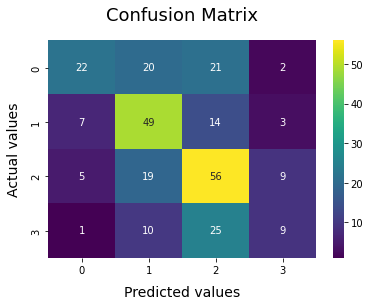

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [ ]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1))])

In [ ]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0.1
tfidf__ngram_range: (1, 1)


## Visualisasi

In [ ]:
models = [        
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.971519,0.5


In [ ]:
models_comparison = [                        
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)                      
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.5,0.5,0.507101,0.481516


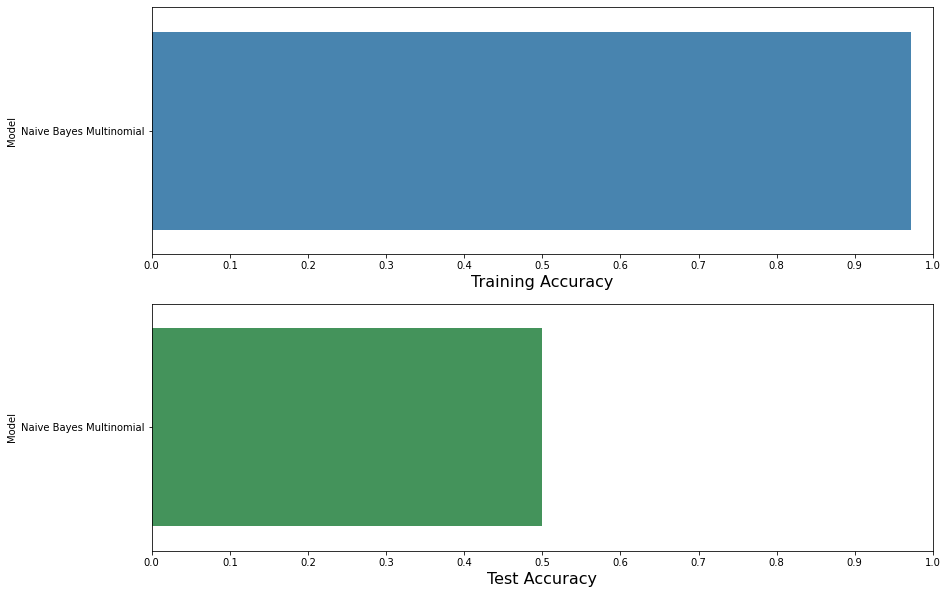

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()